# **Andrel John M. Pantanoza**

# **BSCS 3A IS**

# **Assessment Task 7**

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [20]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Netflix_Userbase.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Display summary statistics of the DataFrame
print("\nSummary statistics of the DataFrame:")
print(df.describe())

First few rows of the DataFrame:
   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  

Summary statistics of the DataFrame:
          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.5000

In [21]:
df_dummies = pd.get_dummies(df, drop_first=True)

df_dummies['var'] = df['Monthly Revenue'].astype(int)

In [22]:
X = df_dummies.drop(["var", "Monthly Revenue"], axis = 1)
y = df_dummies["var"]

In [23]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


<ipython-input-24-0667ea81e3ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Device", y="Monthly Revenue", data=df, edgecolor="gray", palette='viridis')
<ipython-input-24-0667ea81e3ef>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Monthly Revenue", data=df, edgecolor="gray", palette='magma')


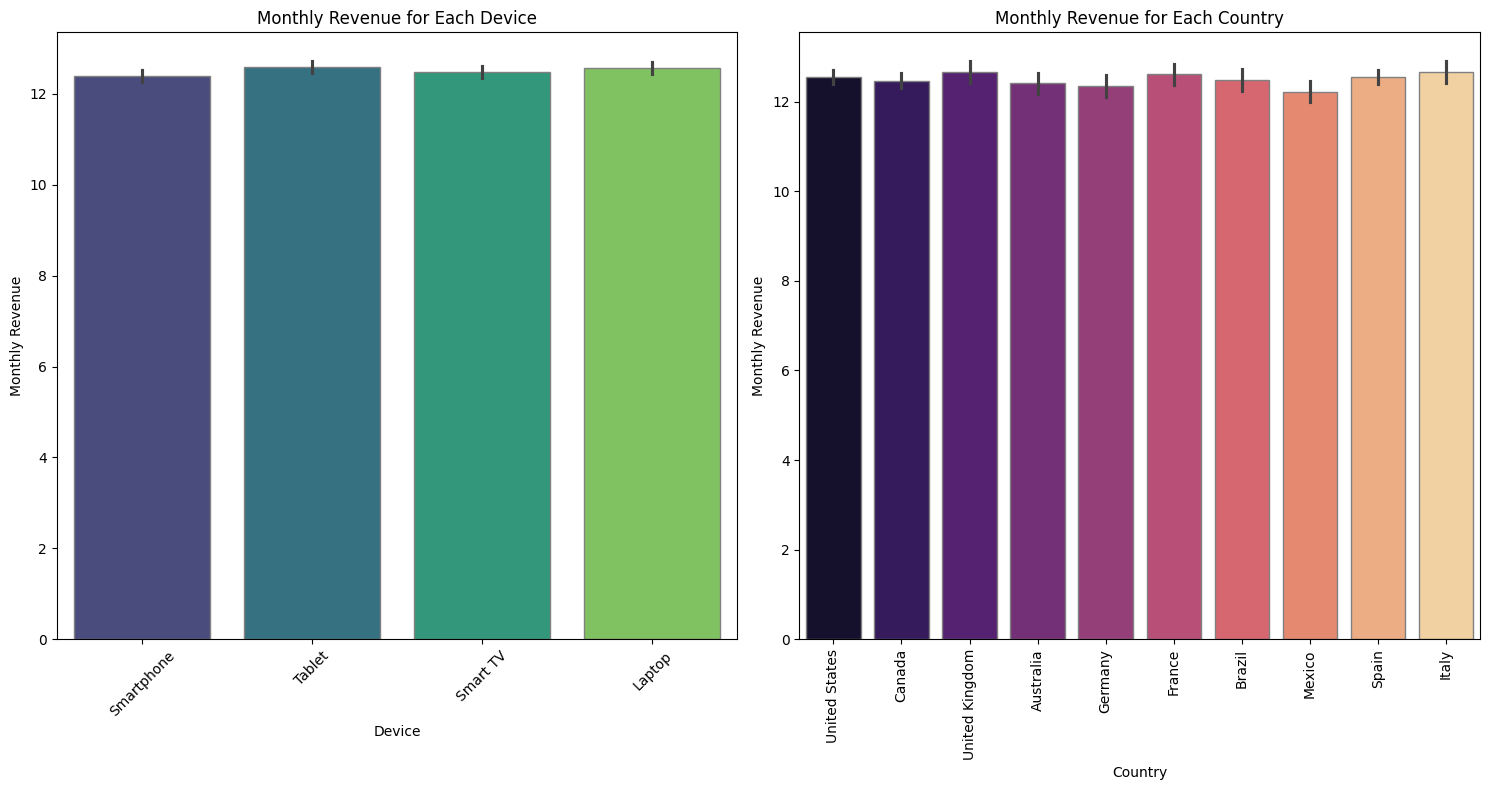

In [24]:
# Set the size of the figure
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.barplot(x="Device", y="Monthly Revenue", data=df, edgecolor="gray", palette='viridis')
plt.title("Monthly Revenue for Each Device")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x="Country", y="Monthly Revenue", data=df, edgecolor="gray", palette='magma')
plt.title("Monthly Revenue for Each Country")
plt.xticks(rotation=90)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.4f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

R-squared: -32155608107971368.0000
RMSE: 295138777.3358
MAE: 19847566.8841


In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Format the report
report = f"""
Accuracy: {accuracy:.4f}

Confusion Matrix:
{conf_matrix}

Classification Report:
{class_report}
"""

# Print the report
print(report)


Accuracy: 0.1500

Confusion Matrix:
[[ 5 18 22 15 12 13]
 [ 9  9 25 13 10 13]
 [11 13 19 16 21 13]
 [13  7 22 16 16 14]
 [ 5 16 18 20 15 11]
 [10 13 12 12 12 11]]

Classification Report:
              precision    recall  f1-score   support

          10       0.09      0.06      0.07        85
          11       0.12      0.11      0.12        79
          12       0.16      0.20      0.18        93
          13       0.17      0.18      0.18        88
          14       0.17      0.18      0.18        85
          15       0.15      0.16      0.15        70

    accuracy                           0.15       500
   macro avg       0.14      0.15      0.15       500
weighted avg       0.15      0.15      0.15       500




<ipython-input-43-91f2ef77b9b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance, y=truncated_features, palette='viridis', orient='h')


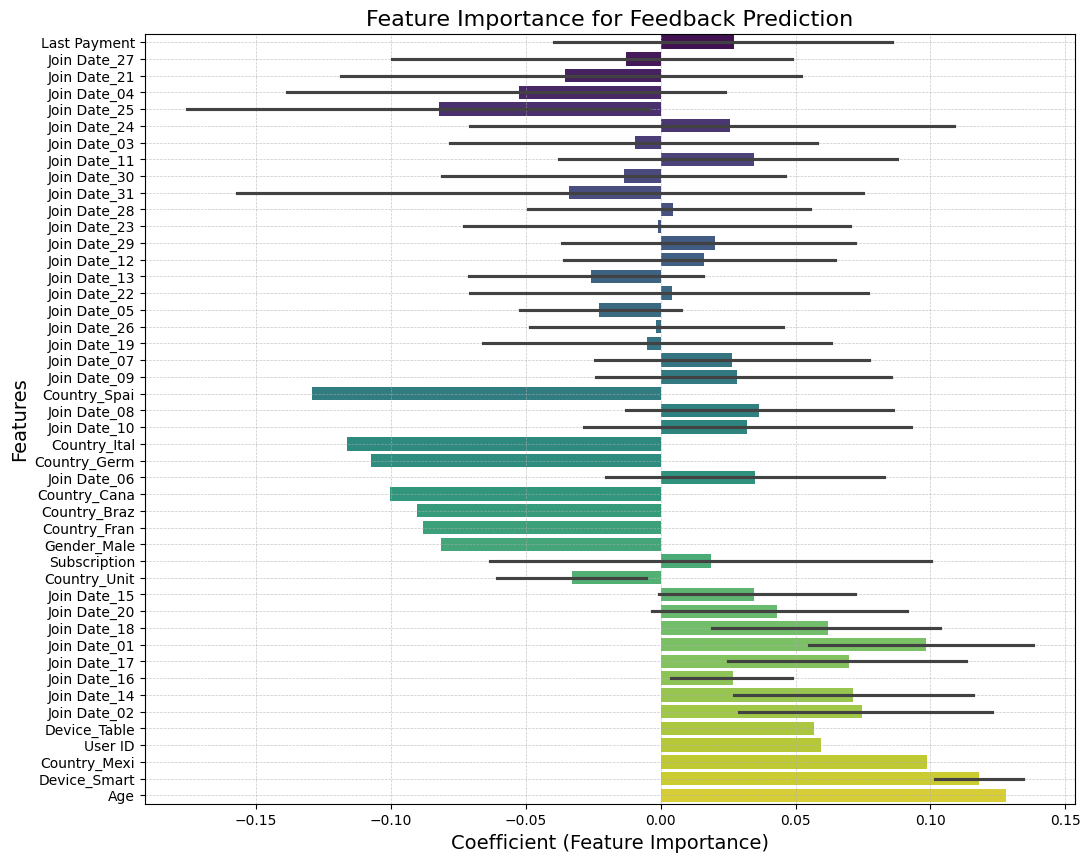

In [43]:
# Get feature importance from the model coefficients
feature_importance = model.coef_[0]

sorted_indices = np.argsort(feature_importance)
sorted_features = X.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

max_label_length = 12
truncated_features = [feat[:max_label_length] for feat in sorted_features]

plt.figure(figsize=(12, 10))  # Adjust figure size
sns.barplot(x=sorted_importance, y=truncated_features, palette='viridis', orient='h')

plt.xlabel("Coefficient (Feature Importance)", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance for Feedback Prediction", fontsize=16)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

Classification Report:
              precision    recall  f1-score   support

          10       0.09      0.06      0.07        85
          11       0.12      0.11      0.12        79
          12       0.16      0.20      0.18        93
          13       0.17      0.18      0.18        88
          14       0.17      0.18      0.18        85
          15       0.15      0.16      0.15        70

    accuracy                           0.15       500
   macro avg       0.14      0.15      0.15       500
weighted avg       0.15      0.15      0.15       500



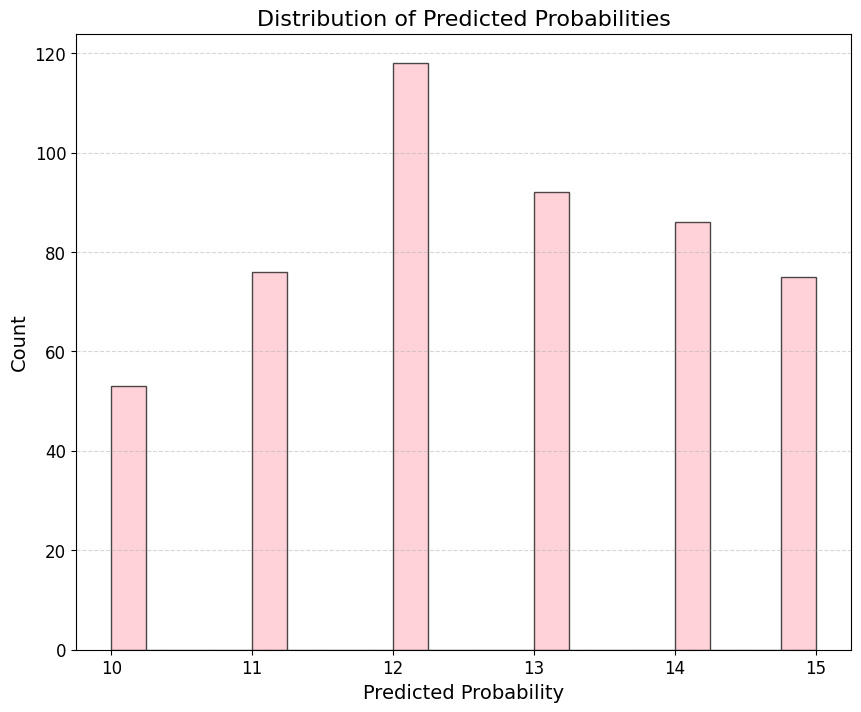

In [46]:
# Generate predictions on the test set
y_pred = model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a histogram to visualize the distribution of predicted probabilities
plt.figure(figsize=(10, 8))
plt.hist(y_pred, bins=20, color='pink', edgecolor='black', alpha=0.7)
plt.xlabel('Predicted Probability', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Predicted Probabilities', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()